importing the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.tri as tri
import numpy as np

inputting both the players names for comparison

In [2]:
playerName1 = str(input())
playerName2 = str(input())

loading the datasets

In [3]:
# Load data from CSV files
key_stats_df = pd.read_csv('archive/key_stats.csv')
disciplinary_df = pd.read_csv('archive/disciplinary.csv')
distribution_df = pd.read_csv('archive/distributon.csv')
attacking_df = pd.read_csv('archive/attacking.csv')

players with the most number of completed passes along with the passing accuracy

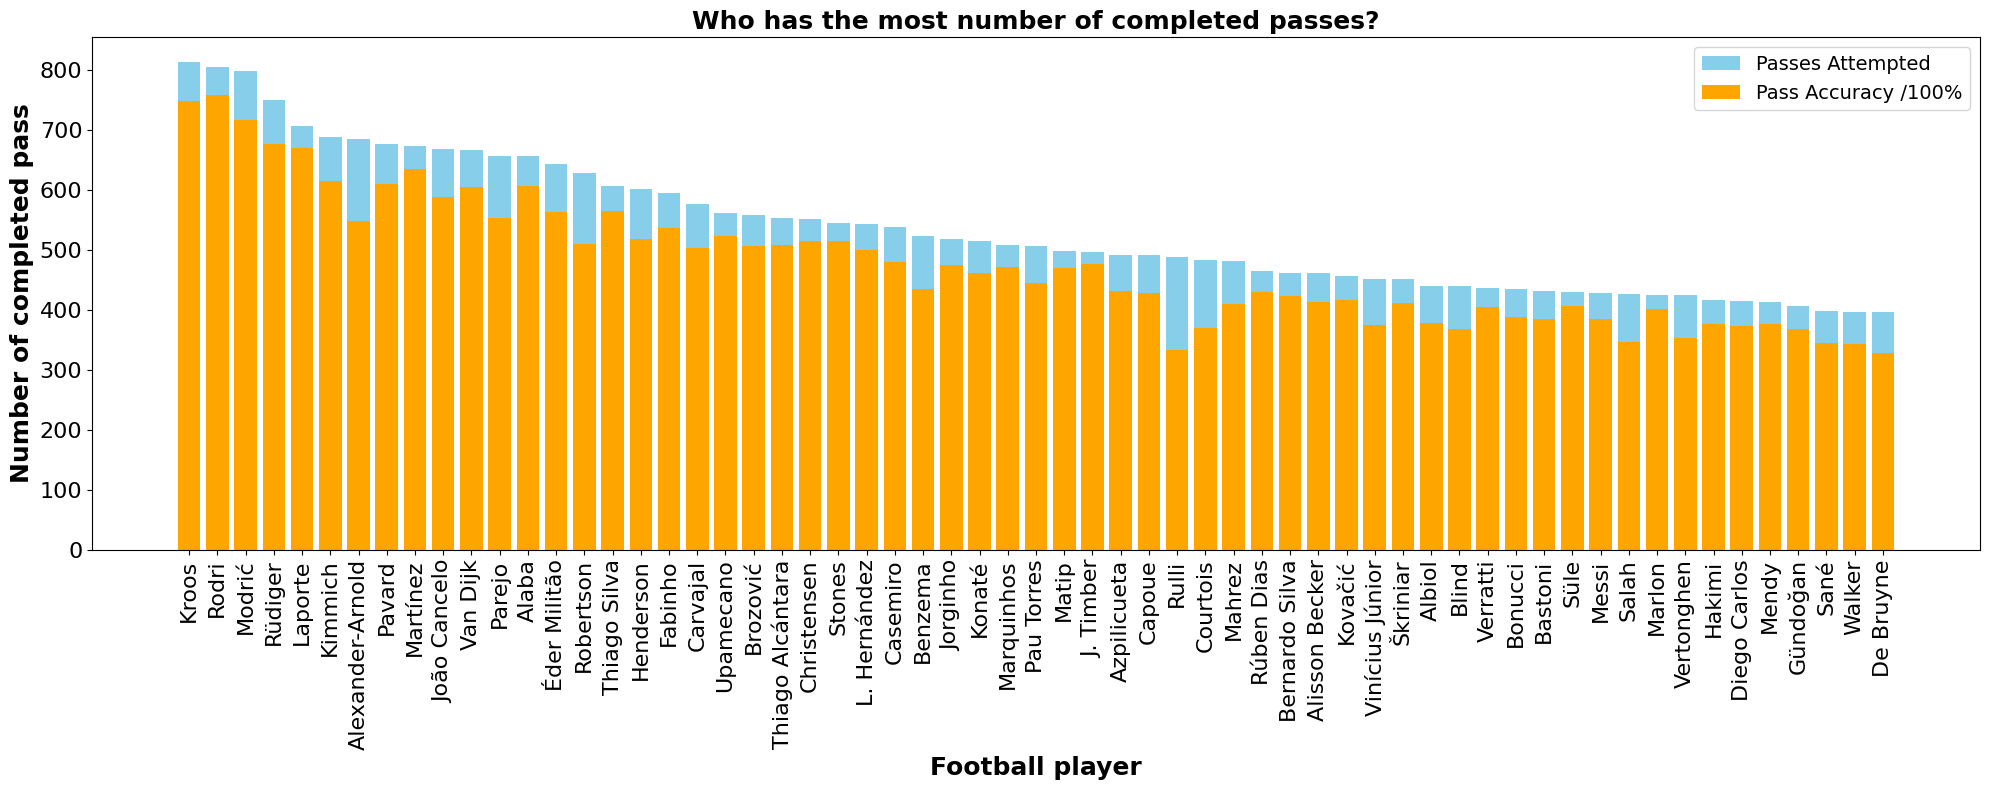

In [4]:
# Sample data (assuming 'distribution_df' is already defined)
players = distribution_df.sort_values(by='pass_attempted', ascending=False)[0:61]['player_name']
pass_completed = distribution_df.sort_values(by='pass_attempted', ascending=False)[0:61]['pass_attempted']
pass_accuracy = distribution_df.sort_values(by='pass_attempted', ascending=False)[0:61]['pass_accuracy']

weightedPassAccuracy = pass_completed * pass_accuracy / 100

# Plotting the bars
plt.figure(figsize=(20, 8))
plt.bar(players, pass_completed, color='skyblue', label='Passes Attempted')
plt.bar(players, weightedPassAccuracy, color='orange', label='Pass Accuracy /100%')

# Adding title and labels
plt.title('Who has the most number of completed passes?', fontsize=18, fontweight='bold')
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of completed pass', fontsize=18, fontweight='bold')

# Adjusting tick labels
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)

# Add legend
plt.legend(fontsize=14)

# Remove grid
plt.grid(False)

# Display the plot
plt.tight_layout()
plt.show()


most assists

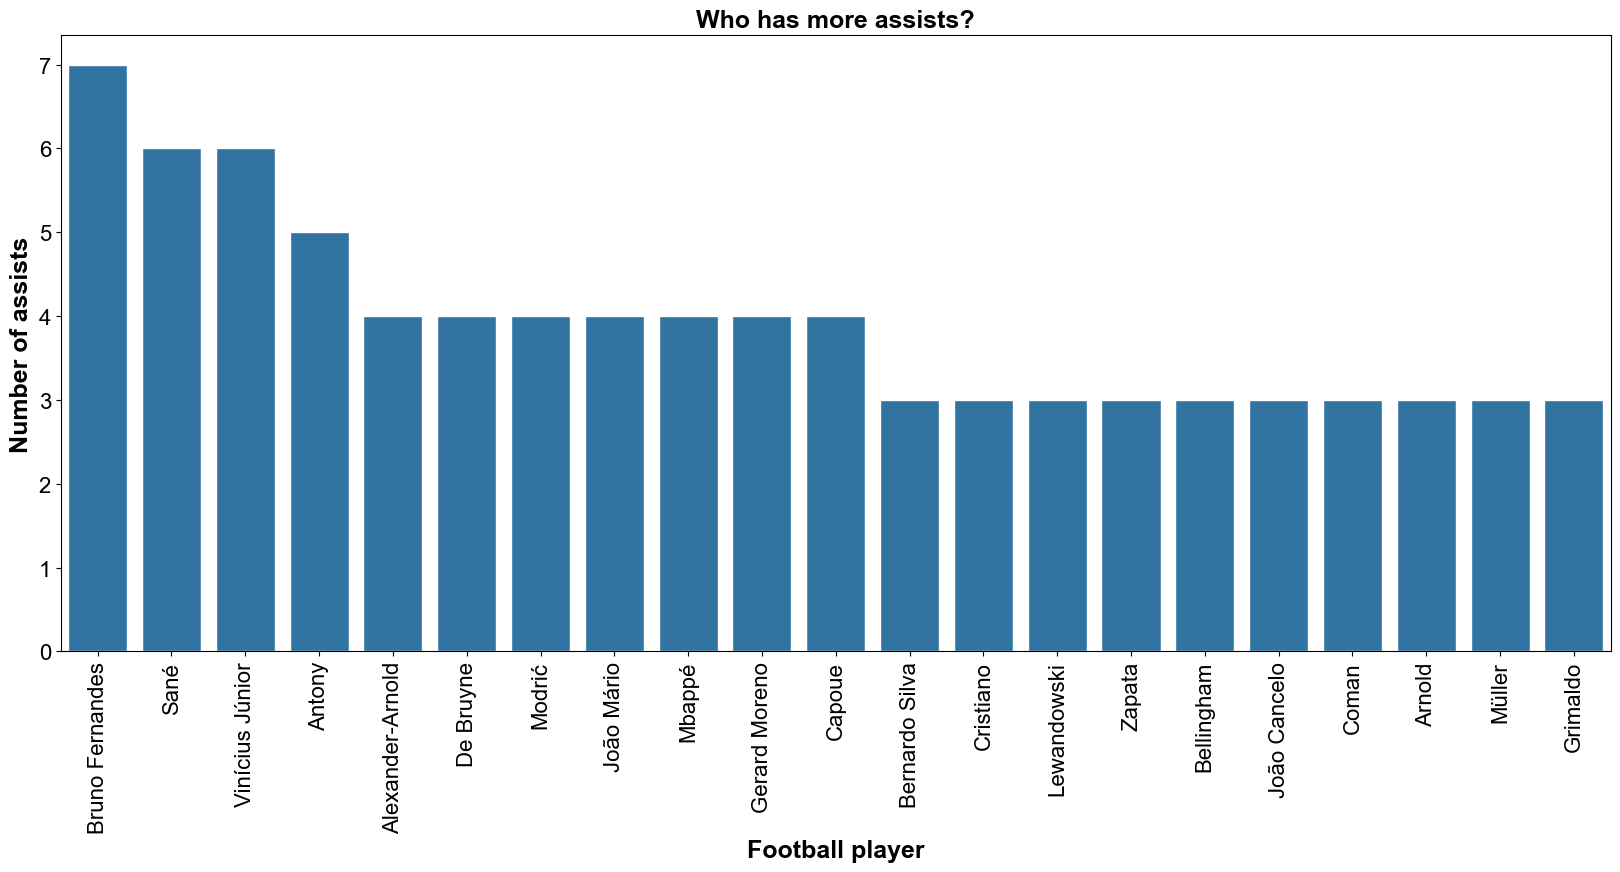

In [5]:
# Set the figure size and title
plt.figure(figsize=(20, 8))
plt.title('Who has more assists?', fontsize=18, fontweight='bold')

# Set the style of the plot
sns.set_style('darkgrid', {
    'axes.facecolor': '0.95',  # Background color of the axes
    'grid.color': '0.1',        # Color of the grid lines
    'figure.facecolor': '0.95'  # Background color of the figure
})

# Create a bar plot
sns.barplot(x=attacking_df.sort_values('assists', ascending=False)[0:21]['player_name'],  # X-axis: Player names
            y=attacking_df.sort_values('assists', ascending=False)[0:21]['assists'])        # Y-axis: Number of assists

# Set labels and ticks for x and y axes
plt.xlabel('Football player', fontsize=18, fontweight='bold')
plt.ylabel('Number of assists', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=16)

# Show the plot
plt.show()


scatter plot for assists vs minutes played

In [6]:
# Read the CSV files
attacking_df = pd.read_csv('archive/attacking.csv')
key_stats_df = pd.read_csv('archive/key_stats.csv')

# Merge the two dataframes on the 'player_name' column
merged_df = pd.merge(attacking_df[['player_name', 'assists']], key_stats_df[['player_name', 'minutes_played']], on='player_name')

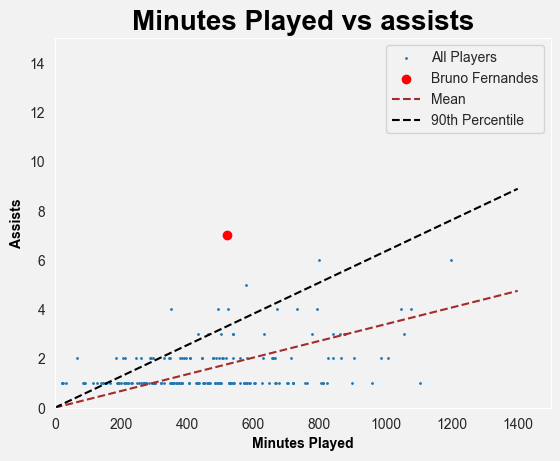

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the limits for the plot
plt.ylim(0, 15)
plt.xlim(0, 1500)

# Set the labels for the axes (switched)
plt.xlabel("Minutes Played", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Assists", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})

# Scatter plot for all players (switched)
plt.scatter((merged_df['minutes_played']), (merged_df['assists']), label='All Players', s=1)

# Scatter plot for the specified player (switched)
player_row = merged_df[merged_df['player_name'] == playerName1]
plt.scatter((player_row['minutes_played'].iloc[0]), (player_row['assists'].iloc[0]), label=playerName1, color='red')

# Mean line (switched)
average_minutes = np.mean(merged_df['minutes_played'])
average_assists = np.mean(merged_df['assists'])
slope = average_assists / average_minutes
x_values = np.linspace(0, 1400, 50)
y_values = slope * x_values
plt.plot(x_values, y_values, color='brown', linestyle='--', label='Mean')

# 90th percentile line (switched)
percentile90_minutes = np.percentile(merged_df['minutes_played'], 90)
percentile90_assists = np.percentile(merged_df['assists'], 90)
slope90 = percentile90_assists / average_minutes
x_values90 = np.linspace(0, 1400, 50)
y_values90 = slope90 * x_values90
plt.plot(x_values90, y_values90, color='black', linestyle='--', label='90th Percentile')

# Display legend and grid
plt.legend()
plt.grid(False)
plt.title("Minutes Played vs assists", fontdict={'fontname': 'Arial', 'fontsize': 20, 'fontweight': 'bold', 'color': 'black'})

# Show the plot
plt.show()

extracting the top 90 percentile

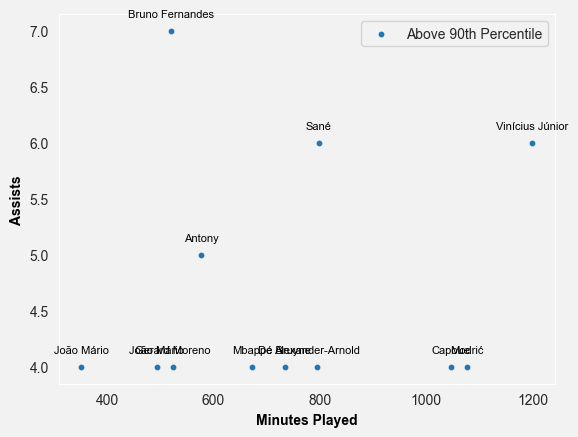

         player_name  assists  minutes_played
0    Bruno Fernandes        7             520
1    Vinícius Júnior        6            1199
2               Sané        6             798
3             Antony        5             577
4   Alexander-Arnold        4             794
5          De Bruyne        4             734
6             Modrić        4            1077
7         João Mário        4             493
8         João Mário        4             351
9             Mbappé        4             673
10     Gerard Moreno        4             524
11            Capoue        4            1046


In [8]:
# Calculate the 90th percentile for assists
percentile90_assists = np.percentile(merged_df['assists'], 90)

# Filter players above the 90th percentile
above_90_percentile = merged_df[merged_df['assists'] > percentile90_assists]

# Plot the scatter plot for players above the 90th percentile line
plt.scatter((above_90_percentile['minutes_played']), (above_90_percentile['assists']), label='Above 90th Percentile', s=10)

# Annotate the names of players above the 90th percentile line
for index, row in above_90_percentile.iterrows():
    plt.annotate(row['player_name'], (row['minutes_played'], row['assists']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='black')

# Set the labels for the axes
plt.xlabel("Minutes Played", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})
plt.ylabel("Assists", fontdict={'fontname': 'Arial', 'fontsize': 10, 'fontweight': 'bold', 'color': 'black'})

# Display legend and grid
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

# Print DataFrame with players above the 90th percentile line
print(above_90_percentile)


stats for player 1's radar chart

In [9]:

# Merge the data frames using the 'player_name' column
playerGraphDataDF = pd.merge(key_stats_df[['player_name', 'minutes_played', 'distance_covered', 'match_played']],
                             disciplinary_df[['player_name', 'fouls_committed', 'fouls_suffered']],
                             on='player_name')
playerGraphDataDF = pd.merge(playerGraphDataDF,
                             distribution_df[['player_name', 'pass_accuracy']],
                             on='player_name')

# Get the row corresponding to playerName1
player_row1 = playerGraphDataDF[playerGraphDataDF['player_name'] == playerName1].iloc[0]

# Extract the matches played and minutes played stats
mp1 = player_row1['match_played']
minp1 = player_row1['minutes_played']

# Calculate ratios for the statistics to plot
playerGraphStats1 = [(player_row1['minutes_played'])/1500, (float(player_row1['distance_covered'])*90)/(minp1*15), 
                    player_row1['fouls_committed']*90/minp1, player_row1['fouls_suffered']*90/(minp1*2), 
                    player_row1['pass_accuracy']/100]
playerGraphStats1



[0.3466666666666667,
 0.6738461538461539,
 0.8653846153846154,
 0.7788461538461539,
 0.782]

stats for player 2's radar chart

In [10]:
# Get the row corresponding to playerName2
player_row2 = playerGraphDataDF[playerGraphDataDF['player_name'] == playerName2].iloc[0]

# Extract the matches played and minutes played stats
mp2 = player_row2['match_played']
minp2 = player_row2['minutes_played']

# Calculate ratios for the statistics to plot
playerGraphStats2 = [(player_row2['minutes_played'])/1500, (float(player_row2['distance_covered'])*90)/(minp2*15), 
                    player_row2['fouls_committed']*90/(minp2*2), player_row2['fouls_suffered']*90/(minp2*2), 
                    player_row2['pass_accuracy']/100]

playerGraphStats2


[0.48933333333333334,
 0.7806539509536785,
 0.5517711171662125,
 0.5517711171662125,
 0.826]

player 1's radar chart

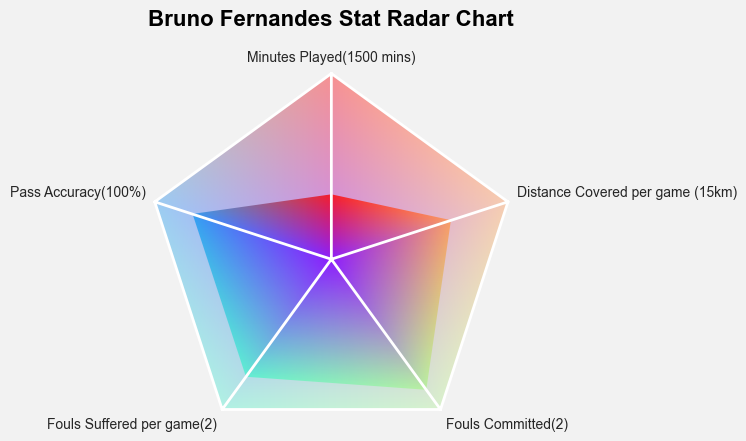

In [11]:
# Define the proportions and labels for the radar chart
proportions = playerGraphStats1
labels = ['Minutes Played(1500 mins)', 'Distance Covered per game (15km)', 
          'Fouls Committed(2)', 'Fouls Suffered per game(2)', 'Pass Accuracy(100%)']
N = len(proportions)

# Append 1 to the proportions to close the shape of the radar chart
proportions = np.append(proportions, 1)

# Calculate angles for each vertex of the radar chart
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)

# Calculate x and y coordinates for each vertex of the radar chart
x = np.append(np.sin(theta), 0)
y = np.append(np.cos(theta), 0)

# Define triangles to form the radar chart
triangles = [[N, i, (i + 1) % N] for i in range(N)]

# Create background and foreground triangles for the radar chart
triang_backgr = tri.Triangulation(x, y, triangles)
triang_foregr = tri.Triangulation(x * proportions, y * proportions, triangles)

# Set up colormap and colors for the triangles
cmap = plt.cm.rainbow_r  
colors = np.linspace(0, 1, N + 1)

# Plot background and foreground triangles
plt.tripcolor(triang_backgr, colors, cmap=cmap, shading='gouraud', alpha=0.4)
plt.tripcolor(triang_foregr, colors, cmap=cmap, shading='gouraud', alpha=0.8)

# Plot triangle outlines
plt.triplot(triang_backgr, color='white', lw=2)

# Add labels to vertices of the radar chart
for label, color, xi, yi in zip(labels, colors, x, y):
    plt.text(xi * 1.05, yi * 1.05, label, ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Turn off axes
plt.axis('off')

# Set aspect ratio to equal
plt.gca().set_aspect('equal')

# Set title for the radar chart
plt.title(playerName1+' Stat Radar Chart\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Show the radar chart
plt.show()

comparison between player 1 and player 2

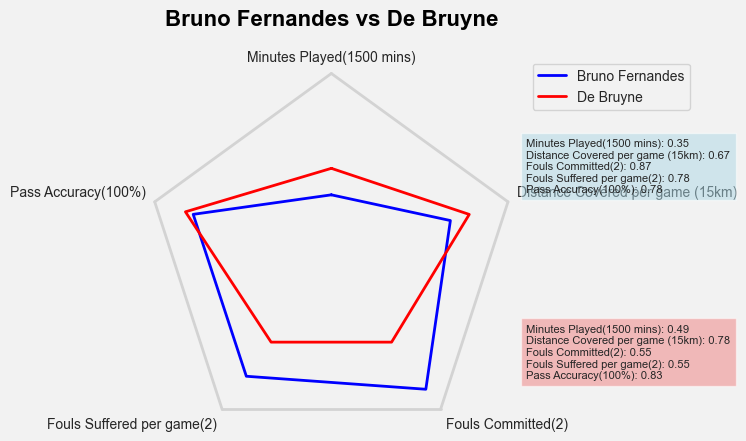

In [12]:
proportions1 = playerGraphStats1
proportions2 = playerGraphStats2

# Remove a label to match the length of proportions
labels = ['Minutes Played(1500 mins)', 'Distance Covered per game (15km)', 
          'Fouls Committed(2)', 'Fouls Suffered per game(2)', 'Pass Accuracy(100%)']

# Define player statistics as strings
stats1 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions1)]
stats2 = [f'{label}: {value:.2f}' for label, value in zip(labels, proportions2)]

# Join the statistics into a single string with line breaks
stats_str1 = '\n'.join(stats1)
stats_str2 = '\n'.join(stats2)

N = len(labels)
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
x = np.sin(theta)
y = np.cos(theta)

# Append the first vertex to the end to close the polygon
x = np.append(x, x[0])
y = np.append(y, y[0])

# Plotting the filled background pentagon with 5 equilateral triangles
for i in range(N):
    plt.plot([x[i], x[(i+1)%N]], [y[i], y[(i+1)%N]], color='lightgray', lw=2)

# Plotting the first player's statistics
plt.plot(x * np.append(proportions1, proportions1[0]), y * np.append(proportions1, proportions1[0]), color='blue', lw=2, label=playerName1)

# Plotting the second player's statistics
plt.plot(x * np.append(proportions2, proportions2[0]), y * np.append(proportions2, proportions2[0]), color='red', lw=2, label=playerName2)

# Adding labels to the vertices
for label, xi, yi in zip(labels, x[:-1], y[:-1]):
    plt.text(xi * 1.05, yi * 1.05, label,
             ha='left' if xi > 0.1 else 'right' if xi < -0.1 else 'center',
             va='bottom' if yi > 0.1 else 'top' if yi < -0.1 else 'center')

# Adding legend and placing it on the extreme right
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Setting plot properties
plt.axis('off')
plt.gca().set_aspect('equal')
plt.title(playerName1 +' vs '+playerName2+'\n', fontdict={'fontname': 'Arial', 'fontsize': 16, 'fontweight': 'bold', 'color': 'black'})

# Adding a text box with player statistics
plt.text(1.05, 0.5, stats_str1, bbox=dict(facecolor='lightblue', alpha=0.5), fontsize=8, verticalalignment='center')
plt.text(1.05, -0.5, stats_str2, bbox=dict(facecolor='lightcoral', alpha=0.5), fontsize=8, verticalalignment='center')

plt.show()